# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('Dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [5]:
print(f'Quantidade de dados NULOS: {alucar.isna().sum().sum()}')

Quantidade de dados NULOS: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

In [10]:
print(sns.__version__)

0.11.2


<AxesSubplot:xlabel='mes', ylabel='vendas'>

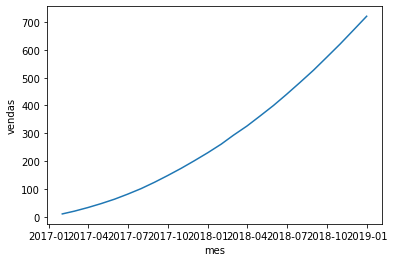

In [11]:
sns.lineplot(x='mes', y='vendas', data=alucar)

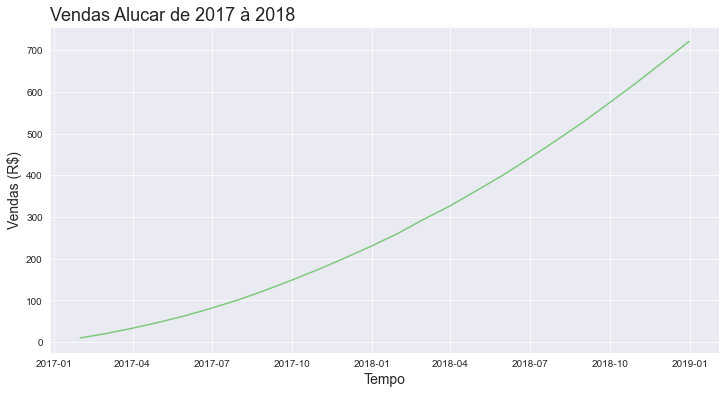

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)

ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 à 2018', loc='left', fontsize= 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [13]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [14]:
alucar["aumento"] = alucar["vendas"].diff() #pega o mes 02 e subtrai o mes 01 e assim por diante.

In [15]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


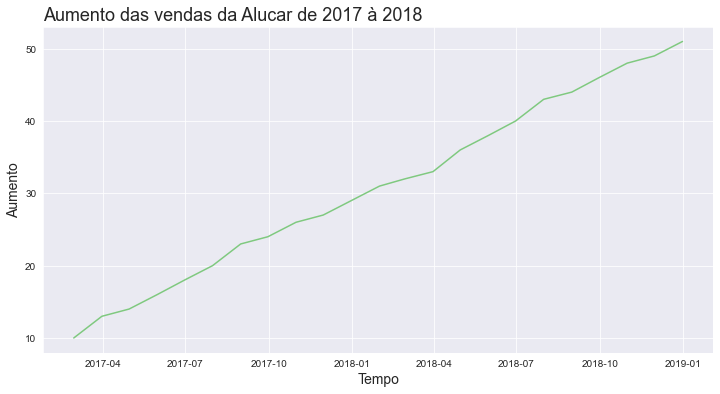

In [16]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='aumento', data=alucar)

ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 à 2018', loc='left', fontsize= 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [17]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize= 18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

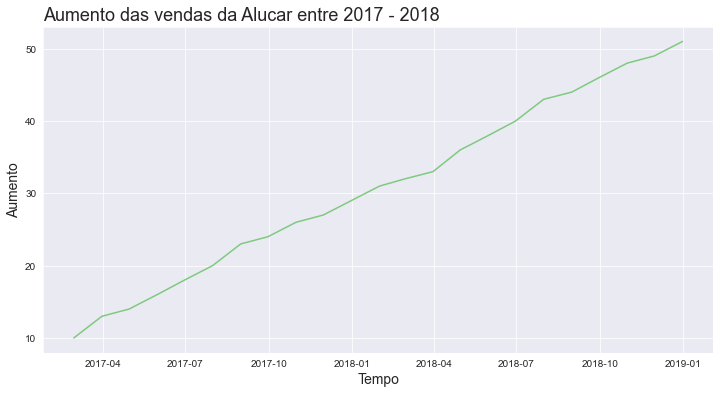

In [18]:
plotar("Aumento das vendas da Alucar entre 2017 - 2018", "Tempo", "Aumento", "mes", "aumento", alucar)

In [19]:
#Descobrindo a aceleração do aumento das vendas


In [20]:
alucar["aceleracao"] = alucar["aumento"].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


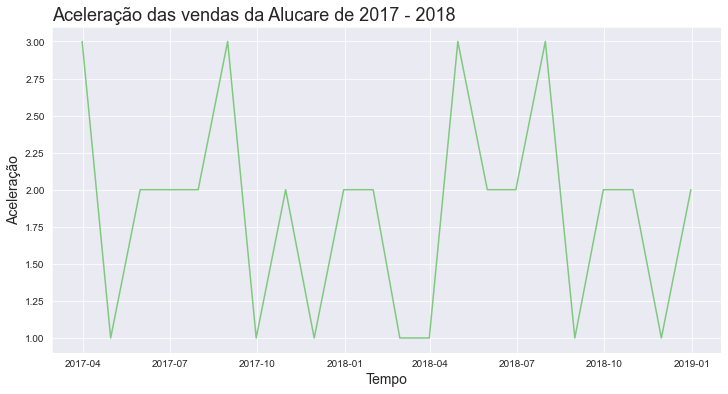

In [21]:
plotar("Aceleração das vendas da Alucare de 2017 - 2018", "Tempo", "Aceleração", "mes", "aceleracao", alucar)


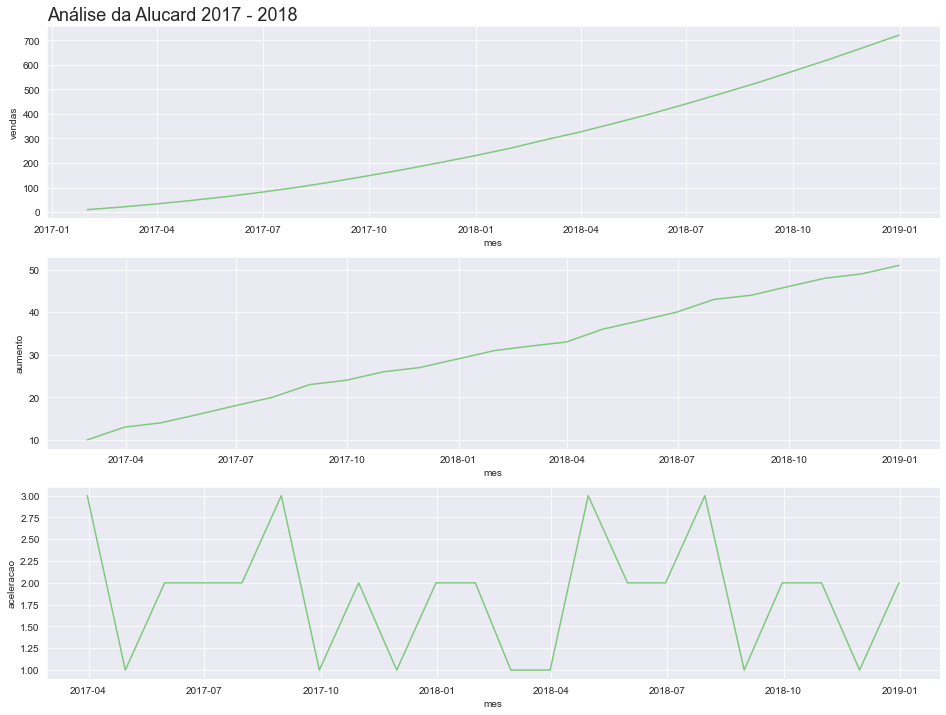

In [22]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title("Análise da Alucard 2017 - 2018", fontsize=18, loc="left")
sns.lineplot(x="mes", y="vendas", data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x="mes", y="aumento", data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x="mes", y="aceleracao", data=alucar)
ax = ax

In [23]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc="left")
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

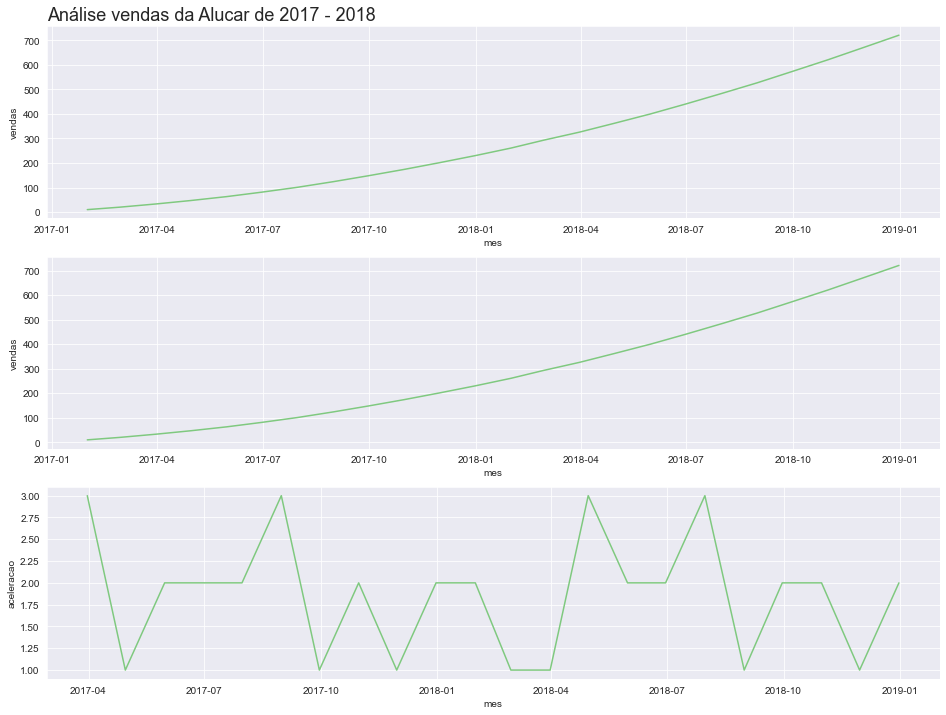

In [24]:
plot_comparacao("mes", "vendas", "aumento", "aceleracao", alucar, "Análise vendas da Alucar de 2017 - 2018")

# Utilizando aucorrelação 

In [25]:
#Autocorrelação	Interpretação
#1	correlação perfeita positiva
#0,7 a 0,9	correlação forte
#0,4 a 0,7	correlação moderada
#0,2 a 0,4	correlação fraca
#0	correlação nula
#< 0	correlação negativa
#-1	correlação perfeita negativa

In [26]:
from pandas.plotting import autocorrelation_plot

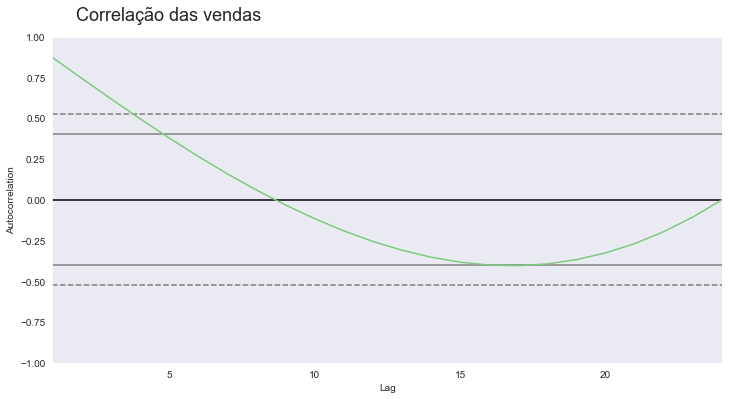

In [27]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação das vendas", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar["vendas"])
ax = ax

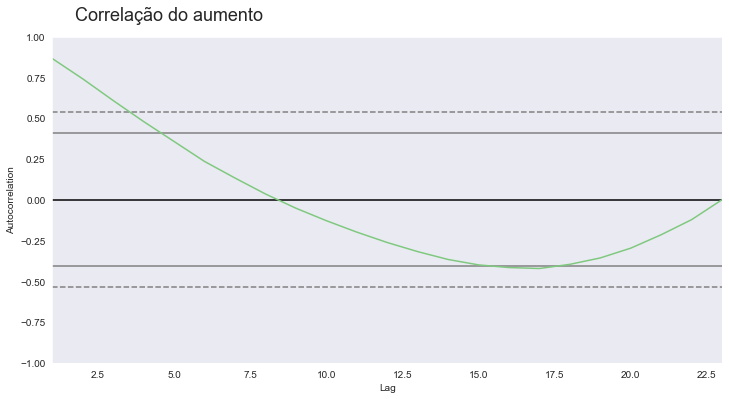

In [28]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação do aumento", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar["aumento"][1:])
ax = ax

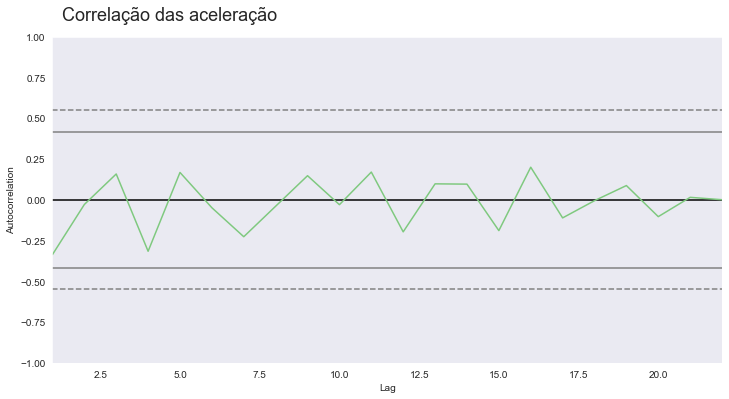

In [29]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle("Correlação das aceleração", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar["aceleracao"][2:])
ax = ax

Análise de Assinantes da Newsletter.

In [30]:
assinantes = pd.read_csv('Dados/newsletter_alucar.csv')

In [31]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [32]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [33]:
print(f"Quantidade de linhas e colunas {assinantes.shape}")
print(f"Quantidade de dados nulos {assinantes.isna().sum().sum()}")

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [34]:
assinantes["mes"] = pd.to_datetime(assinantes["mes"])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [35]:
#Verificando o aumento de assinantes

assinantes["aumento"] = assinantes["assinantes"].diff()
assinantes["aceleracao"] = assinantes["aumento"].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


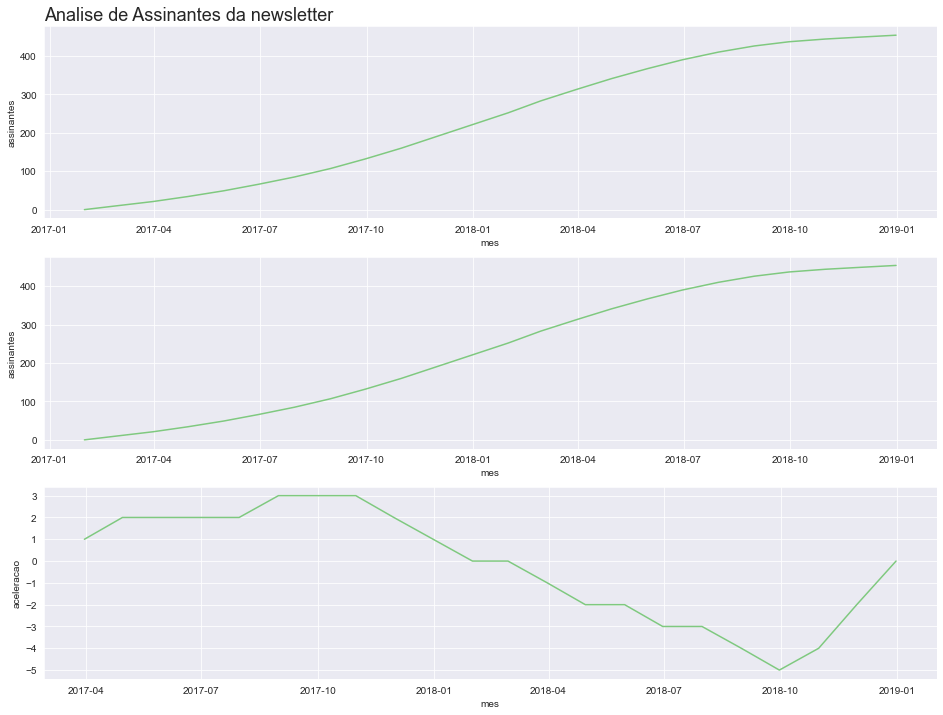

In [36]:
plot_comparacao("mes", "assinantes", "aumento", "aceleracao", assinantes, "Analise de Assinantes da newsletter")

Análise de dados Chocolura

In [37]:
chocolura = pd.read_csv("Dados/chocolura.csv")

In [38]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [39]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [40]:
chocolura["mes"] = pd.to_datetime(chocolura["mes"])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [41]:
print(f"Quantidade de dados nulos: {chocolura.isna().sum().sum()}")
print(f"Quantidade de linhas: {chocolura.shape}")

Quantidade de dados nulos: 0
Quantidade de linhas: (24, 2)


In [42]:
chocolura["aumento"] = chocolura["vendas"].diff()
chocolura["aceleracao"] = chocolura["aumento"].diff()

chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


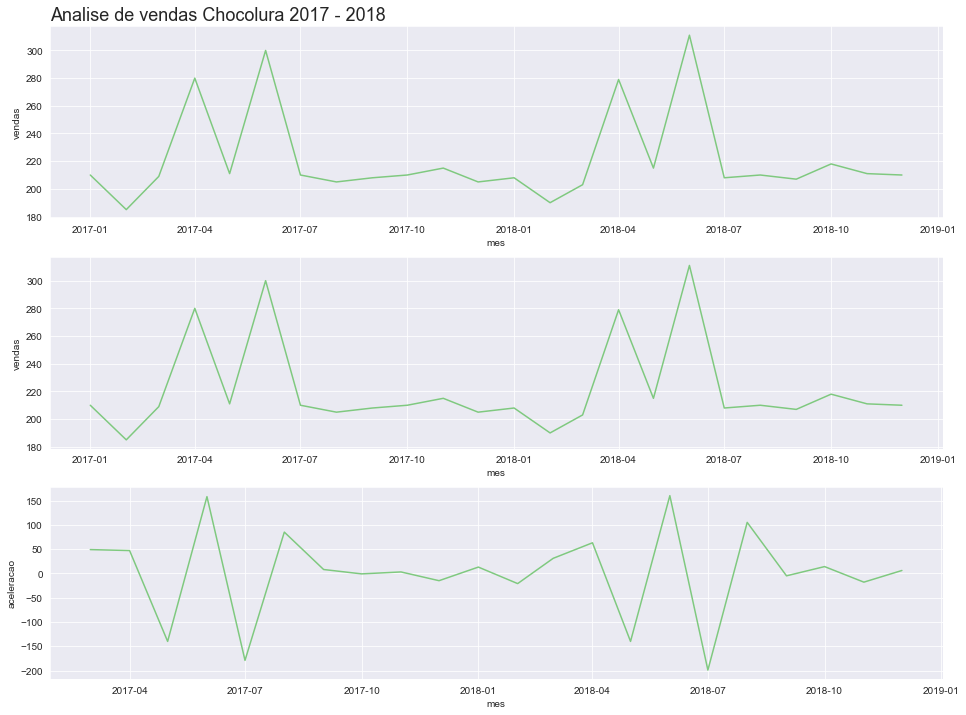

In [43]:
plot_comparacao("mes", "vendas", "aumento", "aceleracao", chocolura, "Analise de vendas Chocolura 2017 - 2018")

Investigando Sazonalidade


In [44]:
#Vendas diárias Outubroe Novembro

In [45]:
vendas_por_dia = pd.read_csv("Dados/vendas_por_dia.csv")
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [47]:
print(f"Quantidade de linhas e colunas: {vendas_por_dia.shape}")
print(f"Quantidade de dados nulos: {vendas_por_dia.isna().sum().sum()}")

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [48]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [49]:
vendas_por_dia["dia"] = pd.to_datetime(vendas_por_dia["dia"])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [50]:
vendas_por_dia["aumento"] = vendas_por_dia["vendas"].diff()
vendas_por_dia["aceleracao"] = vendas_por_dia["aumento"].diff()
vendas_por_dia.head()


,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


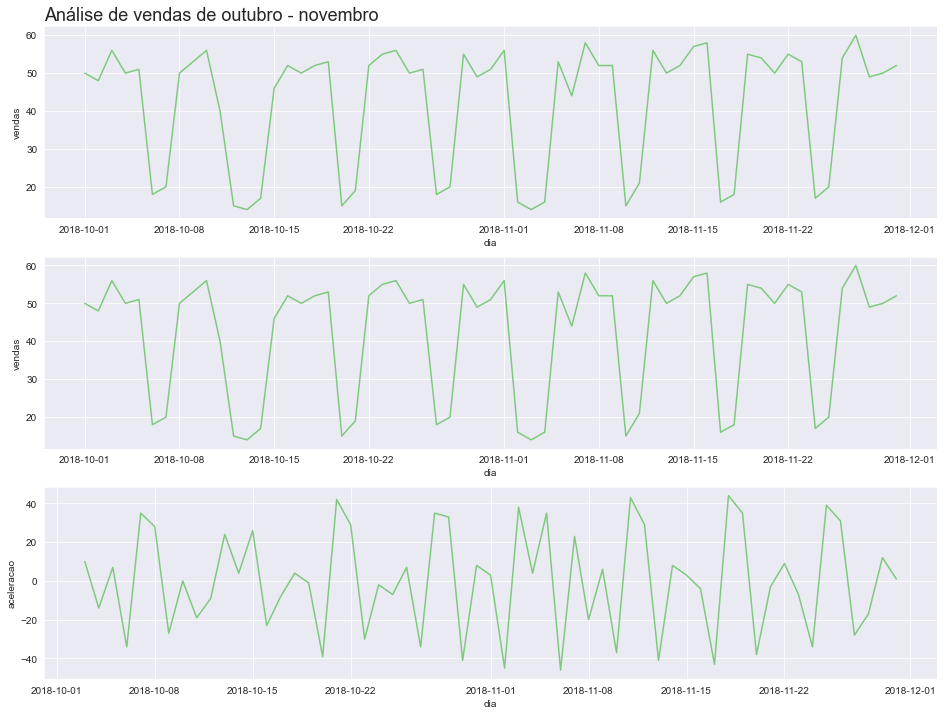

In [51]:
plot_comparacao("dia", "vendas", "aumento", "aceleracao", vendas_por_dia, "Análise de vendas de outubro - novembro")

Análisando Sazonalidade

In [54]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [55]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [56]:
vendas_por_dia["dia_da_semana"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [57]:
dias_traduzidos = {
    "Monday": "Segunda",
    "Tuesday": "Terça",
    "Wednesday": "Quarta",
    "Thursday": "Quinta",
    "Friday": "Sexta",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

In [58]:
vendas_por_dia["dia_da_semana"] = vendas_por_dia["dia_da_semana"].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


**Agrupando os Dias**

In [61]:
vendas_agrupadas = vendas_por_dia.groupby("dia_da_semana")["vendas", "aumento", "aceleracao"].mean().round()
vendas_agrupadas.head(7)

C:\Users\Gustavo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0
